In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TRAINING CONTENT')
os.getcwd()

'C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TRAINING CONTENT'

# Feature Engineering: Feature Creation

### Read in text

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 200) 

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t', header = None)
data.columns = ['label', 'body_text']

### Create feature for text message length

In [3]:
# x= "Hello India"
# res = len(x) - x.count(" ")
# res

10

In [4]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


### Create feature for % of text that is punctuation

In [5]:
import string

In [9]:
text = "Tom's life; good one !!"
pun = [1 for char in text if char in string.punctuation]
round(sum(pun)/(len(text) - text.count(" ")),2)

0.21

In [10]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    ratio = count/(len(text) - text.count(" "))
    return round(ratio, 4)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,160,2.50
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,128,4.69
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.08
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.23
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.14


### Evaluate created features

In [11]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

# Feature Engineering: Feature Creation

### Read in text

### Create feature for text message length

### Create feature for % of text that is punctuation

### Evaluate created features

In [12]:
from matplotlib import pyplot
import numpy as np
#%matplotlib inline

In [18]:
#data[data['label']=='spam']['body_len']

In [19]:
data[data['label']=='spam']['body_len']

1       128
6       132
7       126
9       111
10      130
       ... 
5533     75
5536    126
5543    133
5562    120
5563    131
Name: body_len, Length: 746, dtype: int64

In [25]:
bins = np.linspace(0, 200, 20)

In [31]:
#pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')

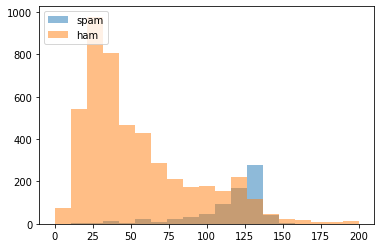

In [33]:
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins,  alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


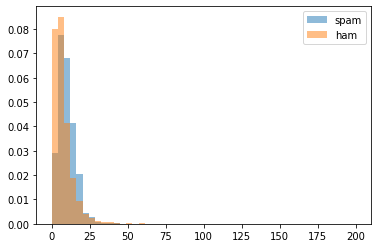

In [35]:
bins = np.linspace(0,200,50)

pyplot.hist(data[data['label']=='spam']['punct%']*2, bins, alpha=.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Feature Engineering: Transformations

### Read in text

In [ ]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [ ]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

### Plot the two new features

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [ ]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

In [ ]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution